# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

**Вывод первых 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Вывод основной информации о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Строим общую гистограмму для всех числовых столбцов таблицы.**

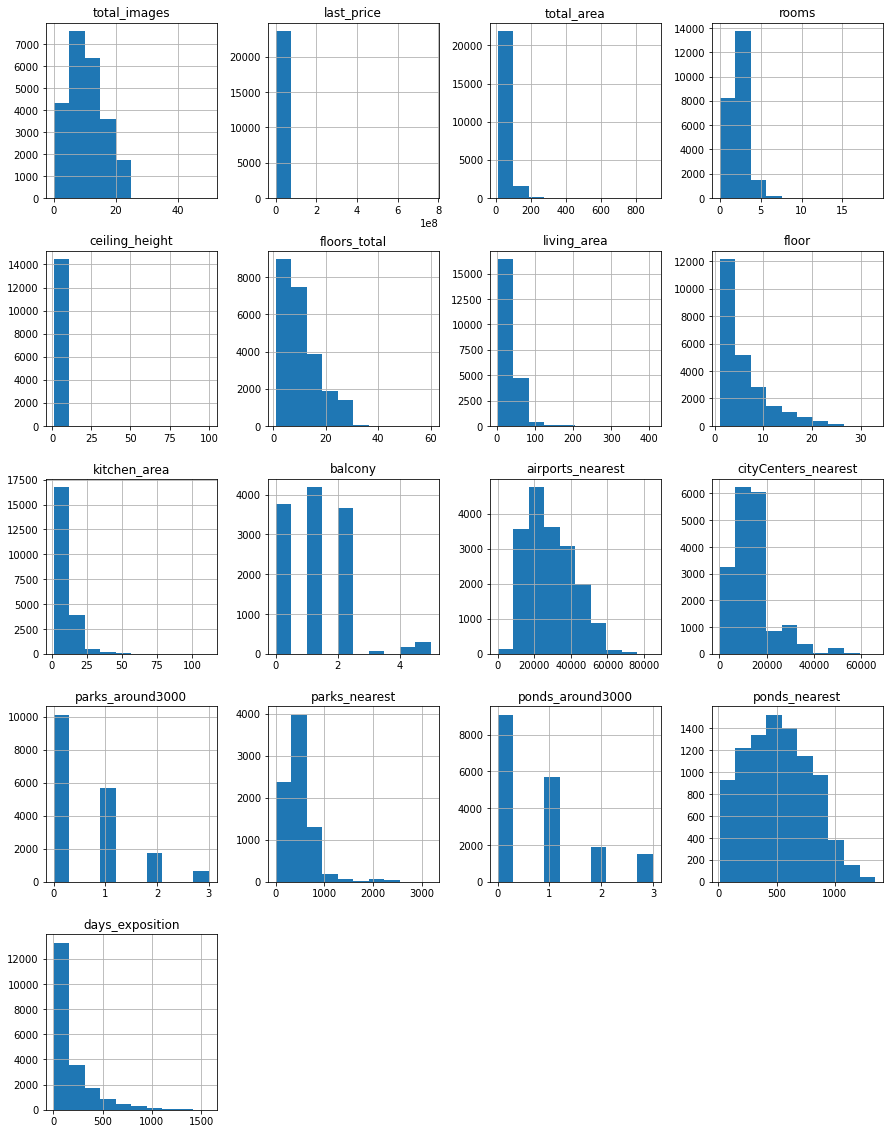

In [4]:
data.hist(figsize=(15, 20));

### Предобработка данных

#### Удаление пропусков
**Выведим количество пропущенных значений для каждого столбца.**

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


**Пропуски наблюдаются в 14 столбцах:**
- `ceiling_height` - высота потолков (м)
- `floors_total` - всего этажей в доме
- `living_area` - жилая площадь в квадратных метрах (м²)
- `is_apartment` - апартаменты или нет
- `kitchen_area` - площадь кухни в квадратных метрах (м²)
- `balcony` - число балконов
- `locality_name` - название населённого пункта
- `airports_nearest` - расстояние до ближайшего аэропорта в метрах (м)
- `cityCenters_nearest` -  расстояние до центра города (м)
- `parks_around3000` - число парков в радиусе 3 км
- `parks_nearest` - расстояние до ближайшего парка (м)
- `ponds_around3000` - число водоёмов в радиусе 3 км
- `ponds_nearest` -  расстояние до ближайшего водоёма (м)
- `days_exposition` - сколько дней было размещено объявление (от публикации до снятия)

**Оценим возможность заполнения пропусков:**
- `ceiling_height`,`floors_total`, `living_area`, `kitchen_area` - не зная объекта заполнить невозможно

- `is_apartment`- скорее всего, если продавец не заgолнил данную иформацию то объект не является апартаментами, поэтому можем заполнить пропущенные данные параметром `False`.

In [7]:
data['is_apartment'] = data['is_apartment'].fillna('False')
#проверим количество пропусков
data['is_apartment'].isna().sum()

0

- `floors_total` - заполним значением 0 там где неизвемтно количество этажей

In [8]:
data['floors_total'] = data['floors_total'].fillna(0)

- `balcony`- если продавец не указал количество балконов то они отсуствуют и можно указать 0

In [9]:
data['balcony'] = data['balcony'].fillna(0)
#проверим количество пропусков
data['balcony'].isna().sum()

0

- `locality_name` - название можно заполнить на 'Неизвестно'

In [10]:
data['locality_name'] = data['locality_name'].fillna('Неизвестно')
#проверим количество пропусков
data['locality_name'].isna().sum()

0

- `airports_nearest`, `cityCenters_nearest` - можно заполнить в некоторых случаях исходя из других объявлений, но сделаем это позже когда избавимся от неявных дубликатов в названиях населенных пунктов

- `parks_around3000`,`ponds_around3000` - пропуски могут означать, что ни парком ни прудов на расстоянии в 3км нету, поэтому можем заполнить нулями


In [11]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

- `parks_nearest`, `ponds_nearest`, `days_exposition`- логичную замену предложить невозможно


<b>Причины пропусков</b>

Причины пропусков в данном случае могуть быть связанны как с тем, что продавцы недвижимости не заполнили данные об объекте, так и с техническими ошибками при выгрузке данных. 

#### Изменение типов данных

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Изменим тип данных `first_day_exposition` на datetime

In [13]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Изменим тип данных `is_apartment` на bool, так как это или апартаменты или нет

In [14]:
data['is_apartment'] = data['is_apartment'] == True

`floors_total`, `balcony`, `parks_around3000`, `ponds_around3000`, `days_exposition`, `floor` изменим на int

In [15]:
data['floors_total'] = data['floors_total'].astype('Int64')
data['balcony'] = data['balcony'].astype('Int64')
data['parks_around3000'] = data['parks_around3000'].astype('Int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('Int64')
data['floor'] = data['floor'].astype('Int64')
data['days_exposition'] = data['days_exposition'].astype('Float64').astype('Int64')
data['last_price'] = data['last_price'].astype('Int64')

Выведем финальные типы:

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  Int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  Int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  Int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

#### Устраним неявные дубликаты встолбце locality_name

In [17]:
#Посчитаем количество уникальных значений 'locality_name'
len(data['locality_name'].unique())    

365

Заменим букву 'ё' на 'е', 'поселок городского типа' на 'поселок' и выведем количество уникальных значений после этого:

In [18]:
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True)
data['locality_name'] = data['locality_name'].replace('поселок городского типа', 'поселок', regex=True)
len(data['locality_name'].unique())   

330

Значений стало меньше на 35.

Также попробуем убрать слово посклок, так как в данных есть 'поселок Мурино' и 'Мурино', это явно одно и то же

In [19]:
data['locality_name'] = data['locality_name'].replace('поселок Мурино', 'Мурино', regex=True)
len(data['locality_name'].unique())

329

Значений стало меньше еще меньше на 1

#### Устраним редкие и выбивающиеся значения

In [20]:
#Выведем количество уникальных значений 'ceiling_height'
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Явно странно выглядят квартиры с высотой потолков до 2-х метров и более 11-ти.
Сделаем функцию которая делит на 10 высоту и применим ее к столбцу `ceiling_height`:

In [21]:
def ceiling_height_normalize(row):
    try:
        if row > 11:
            return row/10
        else:
            return row
    except:
        pass
    
data['ceiling_height'] =  data['ceiling_height'].apply(ceiling_height_normalize)
data['ceiling_height'].sort_values().unique()

array([ 1.  ,  1.2 ,  1.4 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,  2.3 ,
        2.34,  2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,
        2.52,  2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,
        2.61,  2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,
        2.7 ,  2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,
        2.79,  2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,
        2.88,  2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,
        2.97,  2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,
        3.06,  3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,
        3.15,  3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,
        3.25,  3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,
        3.34,  3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,
        3.44,  3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,
        3.53,  3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,
        3.63,  3.65,

Уберем квартиты с высотой потолков менее 2х метров:

In [22]:
data = data[data['ceiling_height'] > 2]

Посмотрим другие значения столбцов, выбиваются ли они из нормальных значений:

In [23]:
data['living_area'].sort_values().unique()

array([  2. ,   3. ,   5.4, ..., 409. , 409.7,   nan])

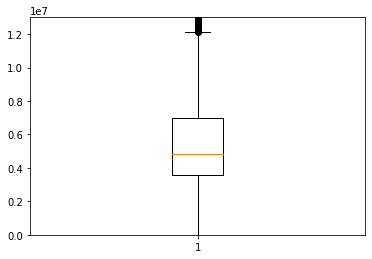

In [63]:
plt.boxplot(data['last_price'])
plt.ylim(0, 13000000);

In [24]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,14488.000000,1.448800e+04,14488.000000,14488.000000,14488.000000,14488.000000,13693.000000,14488.000000,13550.000000,14488.000000,11533.000000,11553.000000,14488.000000,5290.000000,14488.000000,5728.00000,12039.000000
mean,10.323371,6.839073e+06,61.904168,2.137700,2.729727,10.165516,35.685732,5.624517,10.570333,0.680011,28821.232290,14064.528348,0.509318,476.676749,0.618098,518.48743,190.492566
std,5.632323,1.018667e+07,37.001551,1.099216,0.304588,6.202142,22.858341,4.619276,6.055387,1.016076,12627.137072,8759.761196,0.776668,319.967196,0.904875,280.06770,228.773142
min,0.000000,1.219000e+04,12.000000,0.000000,2.200000,0.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,3.000000,0.000000,16.00000,1.000000
25%,6.000000,3.573750e+06,41.000000,1.000000,2.520000,5.000000,19.200000,2.000000,7.000000,0.000000,18552.000000,9038.000000,0.000000,285.000000,0.000000,287.00000,45.000000
50%,10.000000,4.850000e+06,53.400000,2.000000,2.650000,9.000000,30.800000,4.000000,9.000000,0.000000,26752.000000,12949.000000,0.000000,448.500000,0.000000,504.00000,103.000000
75%,15.000000,7.002000e+06,71.377500,3.000000,2.800000,14.000000,43.300000,7.000000,12.000000,1.000000,37083.000000,16033.000000,1.000000,602.000000,1.000000,733.00000,248.000000
max,50.000000,4.200000e+08,900.000000,16.000000,10.300000,60.000000,409.700000,30.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.00000,1580.000000


Жилая площадь вполне может быть 409 м².

Перебрав все значения датасета явных выбивающихся значений в данных я не обнаружил

In [25]:
#Проверка на явные дубликаты
data.duplicated().sum()

0

Явные дубликаты в данных отсуствуют.

**Выводы**

Предобработка обнаружила проблемы в данных:

- пропущенные значения,
- не верные типы данных в дата сете,
- неявные дубликаты,
- не реалистичные значения даных

Пропуски значений заполнены, где это возможно или поставлены заглушки, типы данных приведены в норму, удалены неявные дубликаты, строки с нереалистичными значениями удалены.

### Посчитайте и добавьте в таблицу новые столбцы

Добавим новые столбцы в таблицу:

`price_for_m2` - цена одного квадратного метра

`day_of_publish` - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

`month_of_publish` - месяц публикации объявления

`year_of_publish`- год публикации объявления

`type_of_floor` - тип этажа квартиры (значения — «первый», «последний», «другой»)

`cityCenters_nearest_km` - расстояние до центра города в километрах

In [26]:
data['price_for_m2'] = data['last_price']/data['total_area']
data['price_for_m2'] = data['price_for_m2'].astype(float).round()
data['day_of_publish'] = data['first_day_exposition'].dt.dayofweek
#data['month_of_publish'] = data['first_day_exposition'].dt.month
data['month_of_publish']= data['first_day_exposition'].astype('datetime64[M]')
data['year_of_publish'] = data['first_day_exposition'].dt.year
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000)
data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,day_of_publish,month_of_publish,year_of_publish,cityCenters_nearest_km
17650,8,5100000,54.80,2017-12-01,2,3.00,5,34.20,5,False,...,3,380.0,0,NaN,11,93066.0,4,2017-12-01,2017,11.0
23298,6,3550000,57.30,2017-11-10,2,2.60,9,29.70,8,False,...,0,NaN,0,NaN,445,61955.0,4,2017-11-01,2017,NaN
11703,1,8555400,97.00,2017-04-18,3,2.85,20,60.30,2,False,...,1,679.0,3,361.0,594,88200.0,1,2017-04-01,2017,17.0
2629,20,3150021,36.61,2018-02-20,1,2.55,27,17.71,27,False,...,0,NaN,0,NaN,176,86043.0,1,2018-02-01,2018,NaN
1992,5,4000000,37.40,2018-02-11,1,2.53,16,36.40,10,False,...,0,NaN,1,1052.0,74,106952.0,6,2018-02-01,2018,22.0


In [69]:
data['price_for_m2'] = data['price_for_m2'].astype('Int64')
data['price_for_m2']

0        120370
4        100000
9         88525
10       127525
13        82944
          ...  
23691    129904
23693     73718
23694     72491
23697    149511
23698     41796
Name: price_for_m2, Length: 14488, dtype: Int64

Создадим и применим функцию для опредиление типа этажа:

In [27]:

def type_of_floor_func(floor):
    if floor == 1:
        return 'первый'
    else:
        return 'другой'
    

data['type_of_floor'] = data['floor'].apply(type_of_floor_func)
#последний этаж опредилим через loc
data.loc[(data.floor == data.floors_total), 'type_of_floor'] = 'последний'    

### Проведите исследовательский анализ данных

#### Проведем анализ по следующим параметрам:
    
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

**Общая площадь:**

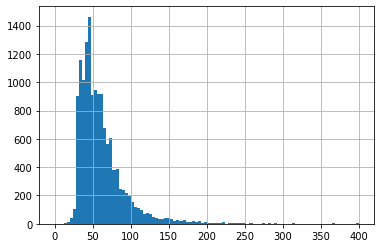

In [28]:
data['total_area'].hist(bins=100,range = (0,400));

Основная масса продаваемых объектов прощадью около 50 метров

**Жилая площадь:**

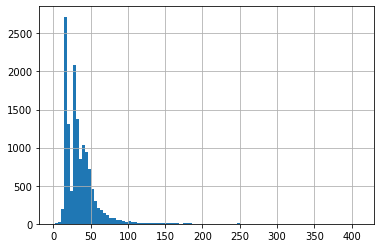

In [29]:
data['living_area'].hist(bins=100);

Основная масса объектов с жилой площадью до 25-30 метров

**Площадь кухни:**

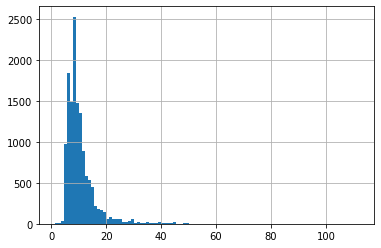

In [30]:
data['kitchen_area'].hist(bins=100);

Большинство объектов с плошадью кухни до 10 метров

**Цена объекта:**

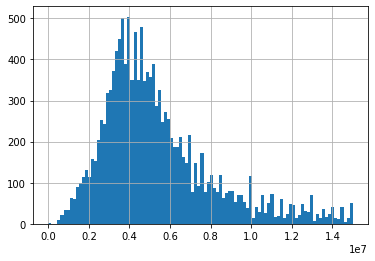

In [31]:
data['last_price'].hist(bins=100, range = (0,15000000));

Большинство объектов в диапазоне 3-5 миллионов рублей

**Количество комнат:**

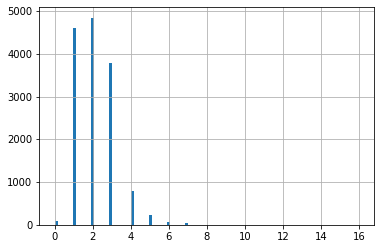

In [32]:
data['rooms'].hist(bins=100);

Больше всего 2х комнатных объектов и 1 комнатных.

**Высота потолков:**

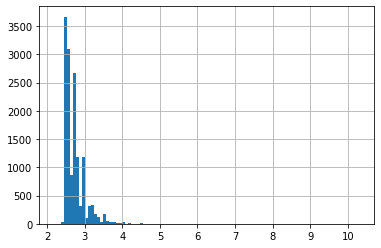

In [33]:
data['ceiling_height'].hist(bins=100);

Основная масса объектов с высотой потолков 2.5-2.7 метра

**Этаж квартиры:**

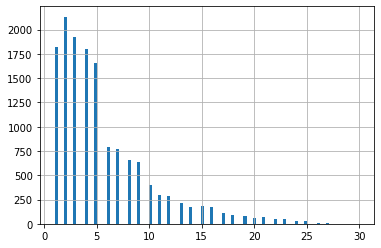

In [34]:
data['floor'].hist(bins=100);

Большинство объектов расположенны на 3-5 этажах

**Тип этажа квартиры:**

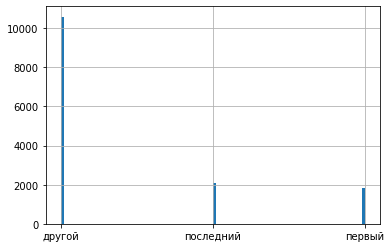

In [35]:
data['type_of_floor'].hist(bins=100);

Большинство объектов расположенны на средних этажах

**Общее количество этажей в доме:**

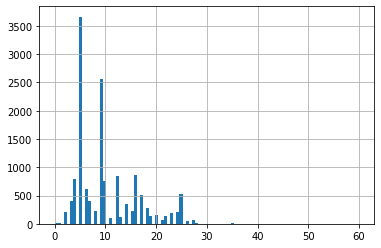

In [36]:
data['floors_total'].hist(bins=100);

Большинство объектов расположенны в 5-ти и 9-ти этажных домах

**Расстояние до центра города в метрах:**

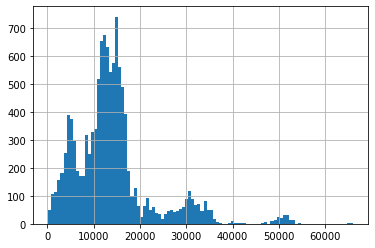

In [37]:
data['cityCenters_nearest'].hist(bins=100);

Большинство объектор расположенны на расстоянии 12-17 километров от центра

**Расстояние до ближайшего аэропорта:**

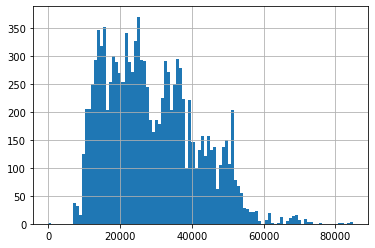

In [38]:
data['airports_nearest'].hist(bins=100);

Основная масса объектов расположенна на удалении около 15-ти и 25-ти километров от аэропорта

**Расстояние до ближайшего парка:**

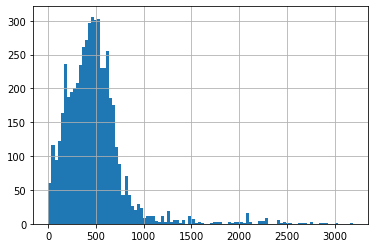

In [39]:
data['parks_nearest'].hist(bins=100);

Большинство объектов расположенны в 400-600 метрах от ближайшего парка

**День и месяц публикации объявления:**

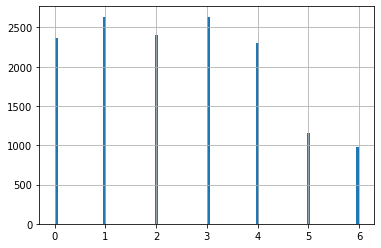

In [40]:
data['day_of_publish'].hist(bins=100);

Большинство объявлений дают в будние дни, на выходных наблюдается спад

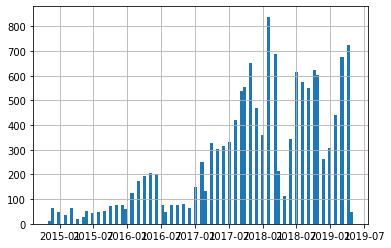

In [41]:
data['month_of_publish'].hist(bins=100);

Большинство объявлений опубликованно в феврале, марте, апреле и в ноябре

#### Изучим как быстро продавались квартиры

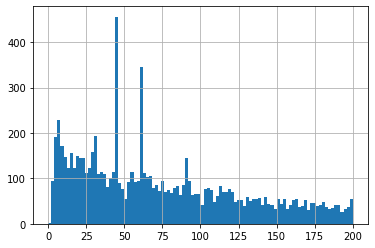

In [42]:
data['days_exposition'].hist(bins=100, range=(0,200));

In [43]:
data['days_exposition'].mean()

190.49256582772657

In [44]:
data['days_exposition'].median()

103.0

Основная масса квартир продается за 40-60 дней. Как я считаю то что до медианы - это быстрые продажи, т. е. менее 103 дней. Все что уходит в далее Q3 и далее - долгими. Необычно долгими будут продажи кторые уходт за Q3*1.5 и будут равны более 372 дней.

In [45]:
data['days_exposition'].describe()

count    12039.000000
mean       190.492566
std        228.773142
min          1.000000
25%         45.000000
50%        103.000000
75%        248.000000
max       1580.000000
Name: days_exposition, dtype: float64

#### Факторы больше всего влияющие на общую (полную) стоимость объекта

**Зависимость цены от общей площади:**

0.7129487886590012


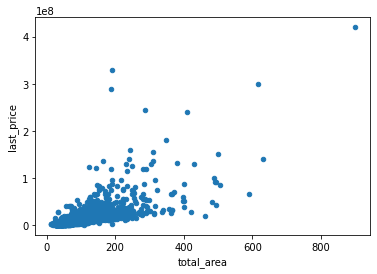

In [46]:
data.plot(x='total_area', y='last_price', kind='scatter');
#выведем дополнительно коэффициент корреляции Пирсона
print(data['total_area'].corr(data['last_price'].astype('float64')))

На графике видна высокая положительная кореляция, цена сильно зависит от площади объектаи

In [73]:
data['last_price'] = data['last_price'].astype('int')

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14488 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            14488 non-null  int64         
 1   last_price              14488 non-null  int64         
 2   total_area              14488 non-null  float64       
 3   first_day_exposition    14488 non-null  datetime64[ns]
 4   rooms                   14488 non-null  int64         
 5   ceiling_height          14488 non-null  float64       
 6   floors_total            14488 non-null  Int64         
 7   living_area             13693 non-null  float64       
 8   floor                   14488 non-null  Int64         
 9   is_apartment            14488 non-null  bool          
 10  studio                  14488 non-null  bool          
 11  open_plan               14488 non-null  bool          
 12  kitchen_area            13550 non-null  float6

In [75]:
data['total_area'].corr(data['last_price'])

0.7129487886590012

**Зависимость цены от жилой площади:**

0.6153947322135802


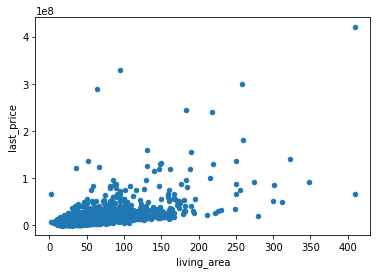

In [47]:
data.plot(x='living_area', y='last_price', kind='scatter');
#выведем дополнительно коэффициент корреляции Пирсона
print(data['living_area'].corr(data['last_price'].astype('float64')))

На графике также видна высокая положительная кореляция, цена зависит от жилой площади объекта но менее сильно чем от общей площади

**Зависимость цены от площади кухни:***

0.5359192942873572


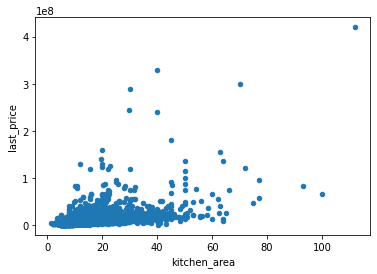

In [48]:
data.plot(x='kitchen_area', y='last_price', kind='scatter')
#выведем дополнительно коэффициент корреляции Пирсона
print(data['kitchen_area'].corr(data['last_price'].astype('float64')))

На графике также видна еще высокая положительная кореляция, но цена зависит меньше чем от общей площади и жилой площади объекта 

***Зависимость цены от количества комнат***

0.4014785442639324


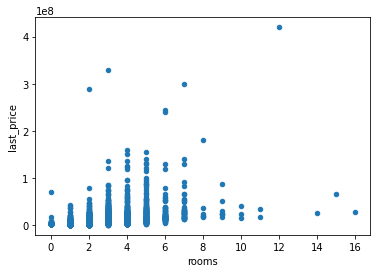

In [49]:
data.plot(x='rooms', y='last_price', kind='scatter')
#выведем дополнительно коэффициент корреляции Пирсона
print(data['rooms'].corr(data['last_price'].astype('float64')))

Зависимость еще меньше чем у предыдущих параметрах, но она все таки есть

***Зависимость цены от этажа, на котором расположена квартира:***

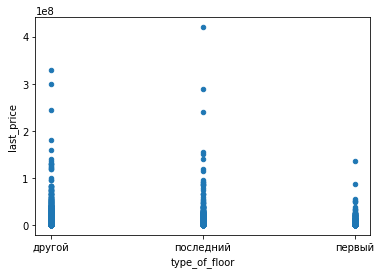

In [50]:
data.plot(x='type_of_floor', y='last_price', kind='scatter');

По графику можно заметить что квартиры на первом этаже дешевле квартир на других этажах включая последний.

***Зависимость цены от даты размещения (день недели, месяц, год):***

День недели:

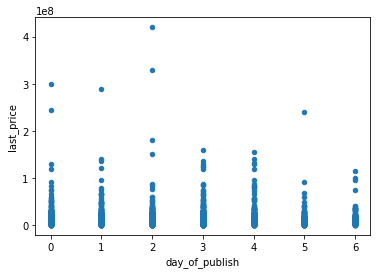

In [51]:
data.plot(x='day_of_publish', y='last_price', kind='scatter');

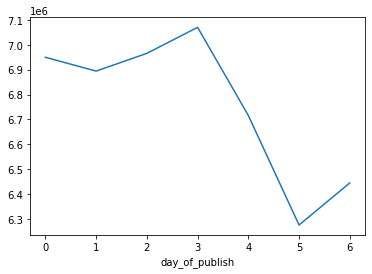

In [52]:
data.groupby('day_of_publish')['last_price'].mean().plot();

Месяц:

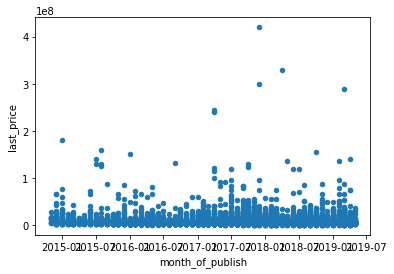

In [53]:
data.plot(x='month_of_publish', y='last_price', kind='scatter');

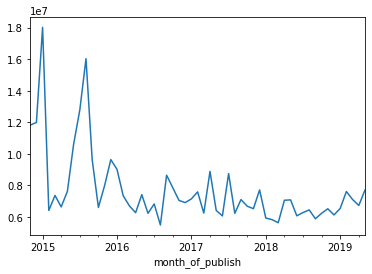

In [54]:
data.groupby('month_of_publish')['last_price'].mean().plot();

Год:

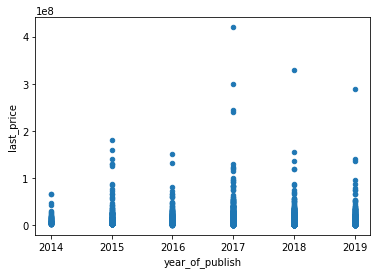

In [55]:
data.plot(x='year_of_publish', y='last_price', kind='scatter');

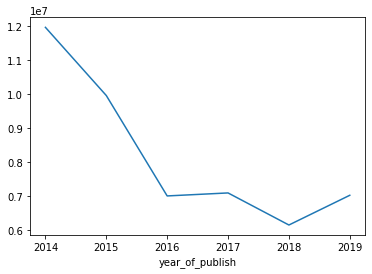

In [56]:
data.groupby('year_of_publish')['last_price'].mean().plot();

Зависимости от даты подачи объявления особой нет.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [57]:
#опредилим 10 населённых пунктов с наибольшим числом объявлений
data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)

locality_name
Санкт-Петербург      10098
Всеволожск             271
Пушкин                 234
Мурино                 228
поселок Шушары         217
Колпино                203
Гатчина                149
Петергоф               145
поселок Парголово      137
Сестрорецк             129
Name: locality_name, dtype: int64

In [58]:
#возмем срез по ним
top_10 = data.query('locality_name == ["Санкт-Петербург", "Всеволожск", "Пушкин", "поселок Шушары", "Мурино", "поселок Шушары", "Колпино", "Гатчина", "Петергоф", "поселок Парголово", "Сестрорецк"]')
#соберем сводную таблицу
top_10.pivot_table(index='locality_name', values='price_for_m2').sort_values(by='price_for_m2', ascending=False)

,price_for_m2
locality_name,
Санкт-Петербург,115730.980986
Пушкин,103920.474359
Сестрорецк,102267.325581
поселок Парголово,90901.321168
Мурино,87816.903509
Петергоф,85554.131034
поселок Шушары,79538.612903
Колпино,75938.527094
Гатчина,69992.644295


In [59]:
data.groupby('locality_name').agg({'last_price':'count', 'price_for_m2':'mean'}).sort_values(by='last_price', ascending=False).head(10)

,last_price,price_for_m2
locality_name,,
Санкт-Петербург,10098,115730.980986
Всеволожск,271,67434.612546
Пушкин,234,103920.474359
Мурино,228,87816.903509
поселок Шушары,217,79538.612903
Колпино,203,75938.527094
Гатчина,149,69992.644295
Петергоф,145,85554.131034
поселок Парголово,137,90901.321168


#### Вычисляем среднюю цену каждого километра до центра в Санкт-Петербурге.

In [60]:
spb = data.query('locality_name == "Санкт-Петербург"')
spb.pivot_table(index='cityCenters_nearest_km', values='price_for_m2').sort_values(by='cityCenters_nearest_km', ascending=False)

,price_for_m2
cityCenters_nearest_km,
29.0,71899.000000
28.0,68468.000000
27.0,193919.000000
26.0,85062.000000
25.0,87803.500000
24.0,90830.800000
23.0,95806.406780
22.0,91597.144231
21.0,97993.844156


Можно увидеть что чем ближе к центру, тем выше цена квадратного метра. Есть несколько выбивающихся значений, связанных с очень большими и дорогими квартирами.

Строим линейную и столбчатую диаграммы:

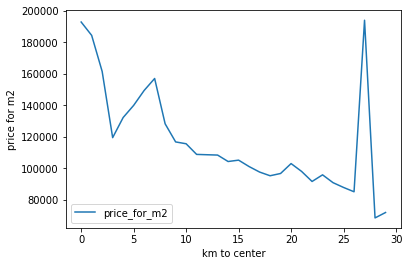

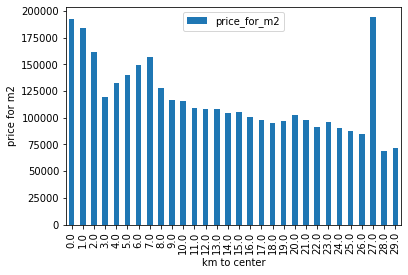

In [61]:
spb.pivot_table(index='cityCenters_nearest_km', values='price_for_m2').plot(ylabel='price for m2', xlabel='km to center');
spb.pivot_table(index='cityCenters_nearest_km', values='price_for_m2').plot(kind='bar',ylabel='price for m2', xlabel='km to center');

### Общий вывод

1. Основная масса продаваемых квартир 1-2-3 комнатных, с площадью около 50 метров, жилой площадью 25-30 метров, размером кухни до 10 метров, стоимостью 3-5 миллионов рублей, с высотой потолков 2.5-2.7 метра.
2. Основная масса квартир продается за 40-60 дней. Продажи до 52 дней можно считать быстрыми, а продажи более 155 дней можно считать долгими. В среднем квартира продается 103 дня.
3. Цена в большей мере зависит от общей и жилой площади, в меньшей от размера кухни и этажа на котором расположенна, хотя квартиры на первом этаже дешевле остальных. От даты размещения объявления цена не зависит.
4. Наибольшее число объявлений дают в Санкт-Петербурге, в топ-10 так же входят Всеволожск, Пушкин, Мурино, поселок Шушары, Колпино, Гатчина, Петергоф, поселок Парголово, Сестрорецк. Их них самая высокая стоимость квадратного метра в Санкт-Петербурге и равна 115730 рублей, самая низкая в Всеволожске и раввна 67434 рублей.
5. Можно отметить что, чем ближе расстояние до центра Санкт-Петербурга, тем выше стоимость квадратного метра.